In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import random
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import euclidean

In [2]:
# Creating a DataFrame from a CSV file
transport = pd.read_csv('dataset.csv') 

#Take a quick look at the data such as using head, describe, info
print(transport.head())
print(transport.info())
print(transport.describe())

                              ID  travel_fee             departure_time  \
0  2013-07-02 19:54:00.000000232         7.0  2013-07-02 19:54:00+00:00   
1    2013-09-28 00:21:31.0000002         5.5  2013-09-28 00:21:31+00:00   
2  2013-06-16 03:18:00.000000150        21.5  2013-06-16 03:18:00+00:00   
3  2013-07-20 13:43:00.000000121         9.5  2013-07-20 13:43:00+00:00   
4    2013-11-05 22:57:17.0000003        15.5  2013-11-05 22:57:17+00:00   

   departure_long  departure_lat  arrival_long  arrival_lat  occupancy  
0      -74.005360      40.728867    -74.008913    40.710907          1  
1      -74.014165      40.708941    -74.016310    40.716734          1  
2      -73.991075      40.760352    -73.941382    40.713292          1  
3      -74.002662      40.723630    -73.991722    40.748905          5  
4      -73.962397      40.712705    -73.996834    40.680403          2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596558 entries, 0 to 2596557
Data columns (total 8 columns):

In [3]:
# Exploring categorical variables
categorical_columns = ['ID','departure_time']
for column in categorical_columns:
    print("\nUnique values in", column)
    print(transport[column].unique())
    print("Value counts:")
    print(transport[column].value_counts())

# Analyzing numerical variables
numerical_columns = ['travel_fee','departure_long',"departure_lat",'arrival_long','arrival_lat', 'occupancy']

for column in numerical_columns:
    print("\nStatistics for", column)
    print("Minimum:", transport[column].min())
    print("Maximum:", transport[column].max())
    print("Mean:", transport[column].mean())
    print("Standard deviation:", transport[column].std())


Unique values in ID
['2013-07-02 19:54:00.000000232' '2013-09-28 00:21:31.0000002'
 '2013-06-16 03:18:00.000000150' ... '2013-05-25 14:48:39.0000002'
 '2013-12-22 20:45:19.0000001' '2013-07-17 18:57:14.0000003']
Value counts:
2013-07-02 19:54:00.000000232    1
2013-12-17 07:31:00.00000095     1
2013-03-03 22:16:00.00000070     1
2013-01-01 11:16:16.0000001      1
2013-08-07 23:54:40.0000002      1
                                ..
2013-06-22 12:05:00.00000049     1
2013-03-20 12:42:00.000000144    1
2013-05-14 00:54:28.0000002      1
2013-12-16 19:45:00.00000087     1
2013-07-17 18:57:14.0000003      1
Name: ID, Length: 2596558, dtype: int64

Unique values in departure_time
['2013-07-02 19:54:00+00:00' '2013-09-28 00:21:31+00:00'
 '2013-06-16 03:18:00+00:00' ... '2013-04-17 10:34:24+00:00'
 '2013-05-25 14:48:39+00:00' '2013-12-22 20:45:19+00:00']
Value counts:
2013-07-24 18:55:00+00:00    22
2013-04-26 22:04:00+00:00    22
2013-03-21 22:01:00+00:00    22
2013-05-03 10:47:00+00:00    

### Visualization

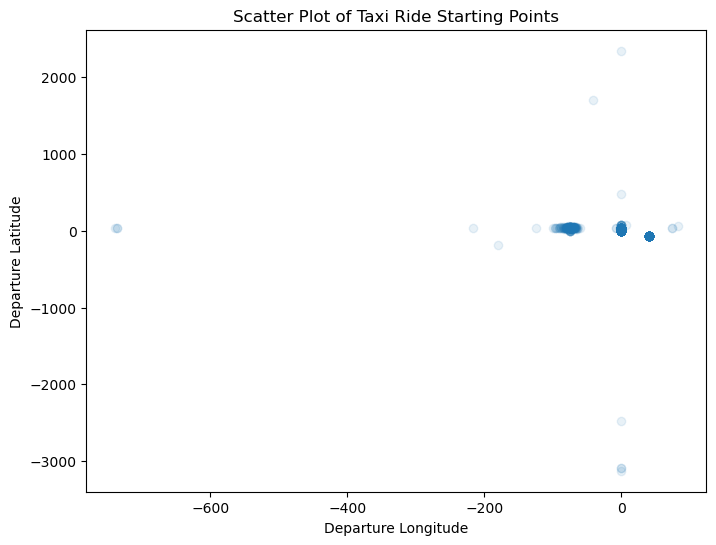

In [4]:
#Diagram 1 Departure longtitude and longtitude
plt.figure(figsize=(8, 6))
plt.scatter(transport['departure_long'], transport['departure_lat'] , alpha=0.1)
plt.xlabel('Departure Longitude')
plt.ylabel('Departure Latitude')
plt.title('Scatter Plot of Taxi Ride Starting Points')
plt.show()

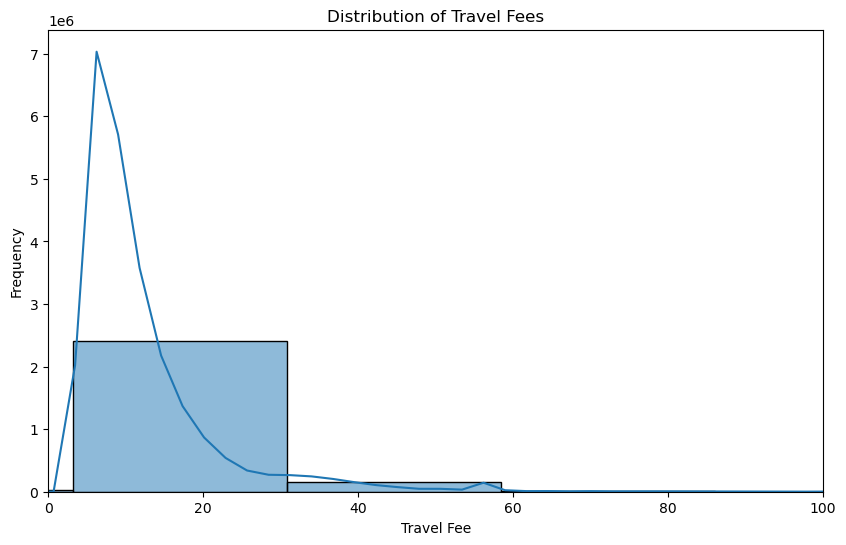

In [5]:
# Diagram 2 Distribution of travel fees
plt.figure(figsize=(10, 6))
sns.histplot(data=transport, x='travel_fee', bins=20, kde=True)
plt.title('Distribution of Travel Fees')
plt.xlabel('Travel Fee')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

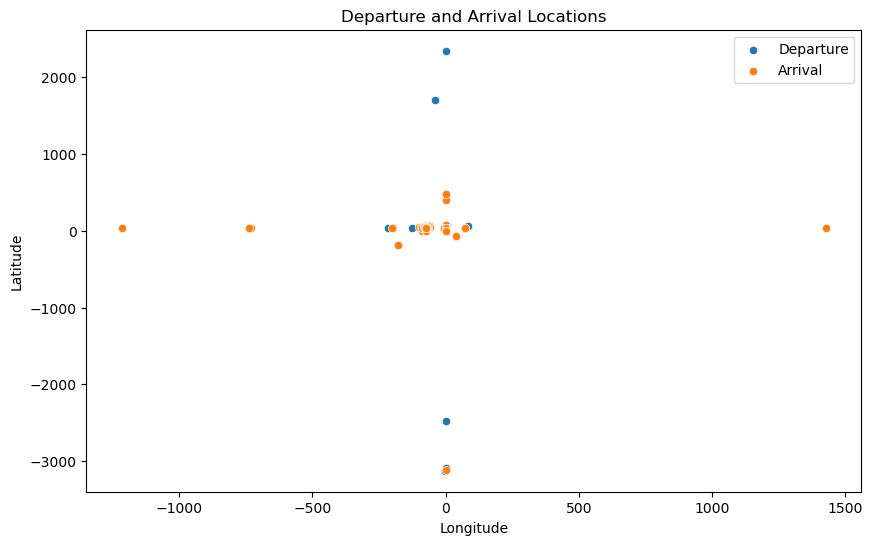

In [6]:
#Diagram 3 Departure and Arrival Locations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transport, x='departure_long', y='departure_lat', label='Departure')
sns.scatterplot(data=transport, x='arrival_long', y='arrival_lat', label='Arrival')
plt.title('Departure and Arrival Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

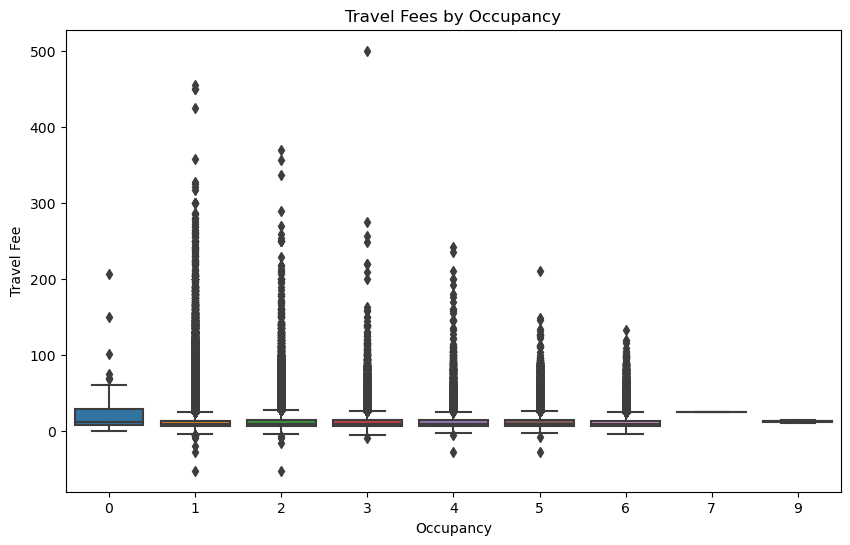

In [7]:
# Diagram 4 Boxplot of travel fees by occupancy
plt.figure(figsize=(10, 6))
sns.boxplot(data=transport, x='occupancy', y='travel_fee')
plt.title('Travel Fees by Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Travel Fee')
plt.show()

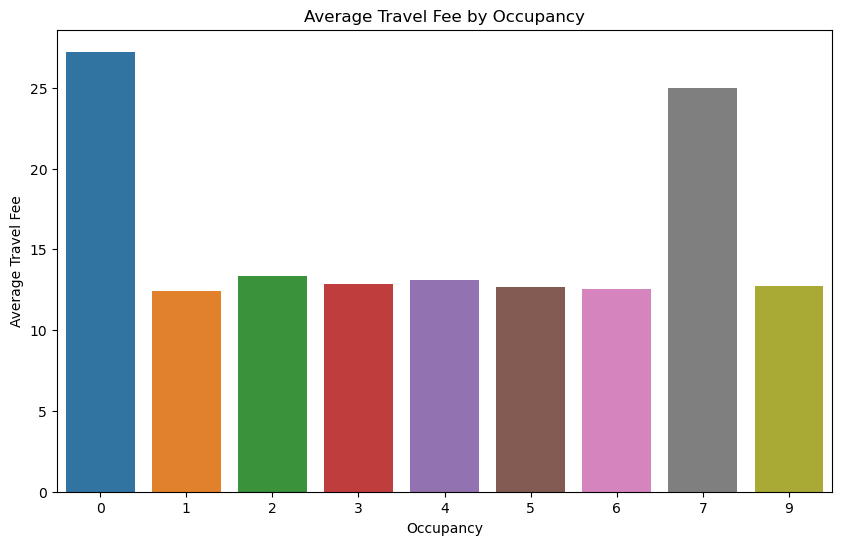

In [8]:
# Diagram 5 Average travel fee by occupancy
avg_fee_by_occupancy = transport.groupby('occupancy')['travel_fee'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_fee_by_occupancy.index, y=avg_fee_by_occupancy.values)
plt.title('Average Travel Fee by Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Average Travel Fee')
plt.show()

### Correlation

In [9]:
corr_matrix = transport.corr(numeric_only=True)
corr_matrix

,travel_fee,departure_long,departure_lat,arrival_long,arrival_lat,occupancy
travel_fee,1.000000,0.019136,-0.014231,0.020735,-0.016891,0.011607
departure_long,0.019136,1.000000,-0.851949,0.953584,-0.902377,0.002792
departure_lat,-0.014231,-0.851949,1.000000,-0.821568,0.850146,-0.007591
arrival_long,0.020735,0.953584,-0.821568,1.000000,-0.921675,0.002815
arrival_lat,-0.016891,-0.902377,0.850146,-0.921675,1.000000,-0.008074
occupancy,0.011607,0.002792,-0.007591,0.002815,-0.008074,1.000000


### Query Date

In [10]:
# 1. Query to find the average travel fee:
average_travel_fee = transport['travel_fee'].mean()
print("Average Travel Fee:", average_travel_fee)

Average Travel Fee: 12.59550563091601


In [11]:
# 2. Query to find the most common departure hour:
transport['departure_hour'] = pd.to_datetime(transport['departure_time']).dt.hour
most_common_departure_hour = transport['departure_hour'].mode()[0]
print("Most Common Departure Hour:", most_common_departure_hour)

Most Common Departure Hour: 19


In [12]:
# Query 3: Travel Fee Range
min_travel_fee = transport['travel_fee'].min()
max_travel_fee = transport['travel_fee'].max()
print("Travel Fee Range: {} - {}".format(min_travel_fee, max_travel_fee))

Travel Fee Range: -52.0 - 500.0


In [13]:
# Query 4: Average Travel Fee by Occupancy
average_fee_by_occupancy = transport.groupby('occupancy')['travel_fee'].mean()
print("Average Travel Fee by Occupancy:")
print(average_fee_by_occupancy)

Average Travel Fee by Occupancy:
occupancy
0    27.232121
1    12.414574
2    13.329285
3    12.883876
4    13.126220
5    12.691388
6    12.563892
7    25.000000
9    12.750000
Name: travel_fee, dtype: float64


In [14]:
# Query 5: Average Travel Fee by Hour
transport['departure_time'] = pd.to_datetime(transport['departure_time'])
transport['hour'] = transport['departure_time'].dt.hour
average_fee_by_hour = transport.groupby('hour')['travel_fee'].mean()
print("Average Travel Fee by Hour:")
print(average_fee_by_hour)

Average Travel Fee by Hour:
hour
0     12.974693
1     12.636056
2     12.587342
3     13.063916
4     15.163880
5     17.127870
6     13.193848
7     12.173393
8     12.151249
9     12.091410
10    12.207936
11    12.383107
12    12.457749
13    12.986697
14    13.303791
15    13.411488
16    13.323480
17    12.847730
18    12.102777
19    11.642705
20    11.811337
21    12.184420
22    12.469038
23    12.869821
Name: travel_fee, dtype: float64


In [15]:
# Query 6: Busiest Departure Locations
most_common_departures = transport.groupby(['departure_lat', 'departure_long']).size().nlargest(5)
print("Busiest Departure Locations:")
print(most_common_departures)

Busiest Departure Locations:
departure_lat  departure_long
0.000000        0.000000         41154
40.744844      -73.948726          111
40.765990      -74.023050           91
40.744916      -73.949047           82
40.736054      -73.990946           38
dtype: int64


In [16]:
# Query 7: Popular Travel Routes
popular_routes = transport.groupby(['departure_lat', 'departure_long', 'arrival_lat', 'arrival_long']).size().nlargest(5)
print("Popular Travel Routes:")
print(popular_routes)

Popular Travel Routes:
departure_lat  departure_long  arrival_lat  arrival_long
0.000000        0.000000       0.000000      0.000000       39789
40.744844      -73.948726      40.744844    -73.948726        111
40.765990      -74.023050      40.765990    -74.023050         91
40.744916      -73.949047      40.744916    -73.949047         82
40.736054      -73.990946      40.736054    -73.990946         38
dtype: int64


### Data Preprocessing

In [17]:
sample_size = 500000
transport = transport.sample(n=sample_size)


travelfee_train, travelfee_test = train_test_split(transport, test_size=0.2, random_state=42)

print("Length of travelfee_train:", len(travelfee_train))
print("Length of travelfee_test:", len(travelfee_test))

Length of travelfee_train: 400000
Length of travelfee_test: 100000


In [18]:
#check is there any data is null value
travelfee_train.isnull().sum()

ID                0
travel_fee        0
departure_time    0
departure_long    0
departure_lat     0
arrival_long      5
arrival_lat       5
occupancy         0
departure_hour    0
hour              0
dtype: int64

In [19]:
#handling missing value
travelfee_train["departure_long"].fillna(travelfee_train["departure_long"].mean(), inplace=True)
travelfee_train["departure_lat"].fillna(travelfee_train["departure_lat"].mean(), inplace=True)
travelfee_train["occupancy"].fillna(travelfee_train["occupancy"].mode()[0], inplace=True)
travelfee_train.drop(columns=['ID'], inplace=True)

# Drop rows with missing "departure_time","arrival_long" and "arrival_lat"
travelfee_train.dropna(subset=["departure_time", "arrival_long", "arrival_lat"],inplace = True)
travelfee_train.isnull().sum()

# Drop rows with a 0 value of occupancy
travelfee_train = travelfee_train.drop(travelfee_train[travelfee_train['occupancy'] <= 0].index)

# Handling Outliers
# Select columns for numeric attributes
num_attribs = ['departure_long', 'departure_lat', 'arrival_long', 'arrival_lat', 'occupancy', 'travel_fee']

# Remove outliers using Z-score method
z_scores = np.abs((travelfee_train[num_attribs] - travelfee_train[num_attribs].mean()) / travelfee_train[num_attribs].std())
travelfee_train = travelfee_train[(z_scores < 3).all(axis=1)]
travelfee_train.info()
travelfee_train

# Filter out rows with 0 values in departure_long, departure_lat, arrival_long, and arrival_lat
travelfee_train = travelfee_train[
    (travelfee_train["departure_long"] != 0) &
    (travelfee_train["departure_lat"] != 0) &
    (travelfee_train["arrival_long"] != 0) &
    (travelfee_train["arrival_lat"] != 0)
]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366078 entries, 2178872 to 73831
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   travel_fee      366078 non-null  float64            
 1   departure_time  366078 non-null  datetime64[ns, UTC]
 2   departure_long  366078 non-null  float64            
 3   departure_lat   366078 non-null  float64            
 4   arrival_long    366078 non-null  float64            
 5   arrival_lat     366078 non-null  float64            
 6   occupancy       366078 non-null  int64              
 7   departure_hour  366078 non-null  int64              
 8   hour            366078 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(3)
memory usage: 27.9 MB


In [20]:
# Convert departure_time to datetime
travelfee_train['departure_time'] = pd.to_datetime(travelfee_train['departure_time'])

# Extract features from departure_time
travelfee_train['hour_of_day'] = travelfee_train['departure_time'].dt.hour
travelfee_train['day_of_week'] = travelfee_train['departure_time'].dt.dayofweek

# Calculate Euclidean distance between departure and arrival locations
travelfee_train['distance'] = travelfee_train.apply(lambda row: euclidean((row['departure_lat'], row['departure_long']),
                                                             (row['arrival_lat'], row['arrival_long'])), axis=1)


In [21]:
travelfee_train.info()
travelfee_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366078 entries, 2178872 to 73831
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   travel_fee      366078 non-null  float64            
 1   departure_time  366078 non-null  datetime64[ns, UTC]
 2   departure_long  366078 non-null  float64            
 3   departure_lat   366078 non-null  float64            
 4   arrival_long    366078 non-null  float64            
 5   arrival_lat     366078 non-null  float64            
 6   occupancy       366078 non-null  int64              
 7   departure_hour  366078 non-null  int64              
 8   hour            366078 non-null  int64              
 9   hour_of_day     366078 non-null  int64              
 10  day_of_week     366078 non-null  int64              
 11  distance        366078 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(5)
memory usage: 36.3 

,travel_fee,departure_time,departure_long,departure_lat,arrival_long,arrival_lat,occupancy,departure_hour,hour,hour_of_day,day_of_week,distance
2178872,5.0,2013-05-23 21:07:25+00:00,-73.981014,40.741859,-73.976396,40.751492,1,21,21,21,3,0.010683
263397,21.0,2013-10-12 16:26:00+00:00,-74.001505,40.732130,-73.949127,40.777312,2,16,16,16,5,0.069173
1405245,6.0,2013-06-18 21:26:00+00:00,-73.976835,40.743232,-73.966640,40.752972,1,21,21,21,1,0.014100
1683635,11.5,2013-07-22 18:23:02+00:00,-74.002247,40.709180,-73.985670,40.727039,3,18,18,18,0,0.024367
2132257,11.5,2013-12-22 03:15:10+00:00,-74.000745,40.727509,-73.974219,40.749841,1,3,3,3,6,0.034675


In [22]:
travelfee = travelfee_train[['hour_of_day', 'day_of_week','occupancy','distance']]
travelfee_labels = travelfee_train["travel_fee"].copy()
x1_train, x1_test, y1_train, y1_test = train_test_split(travelfee, travelfee_labels, test_size=0.2, random_state=42)

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

num_attribs = [ 'hour_of_day', 'day_of_week','occupancy','distance' ]

num_pipeline = make_pipeline(
    StandardScaler()  # Scale features
)
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    # Apply numeric pipeline to numeric attributes
])

In [24]:
transport_prepared = preprocessing.fit_transform(travelfee)
transport_prepared

array([[ 1.13846511, -0.0195296 , -0.49006751, -0.24923937],
       [ 0.37511499,  1.00195286,  0.42778705,  0.47122578],
       [ 1.13846511, -1.04101205, -0.49006751, -0.20714816],
       ...,
       [ 0.98579508,  1.51269408, -0.49006751, -0.20350208],
       [-0.99891523, -1.04101205, -0.49006751, -0.12969275],
       [-2.06760541,  1.00195286, -0.49006751,  0.00424775]])

In [25]:
preprocessing.get_feature_names_out()

array(['num__hour_of_day', 'num__day_of_week', 'num__occupancy',
       'num__distance'], dtype=object)

Visualisation and Query after Data Preprocessing

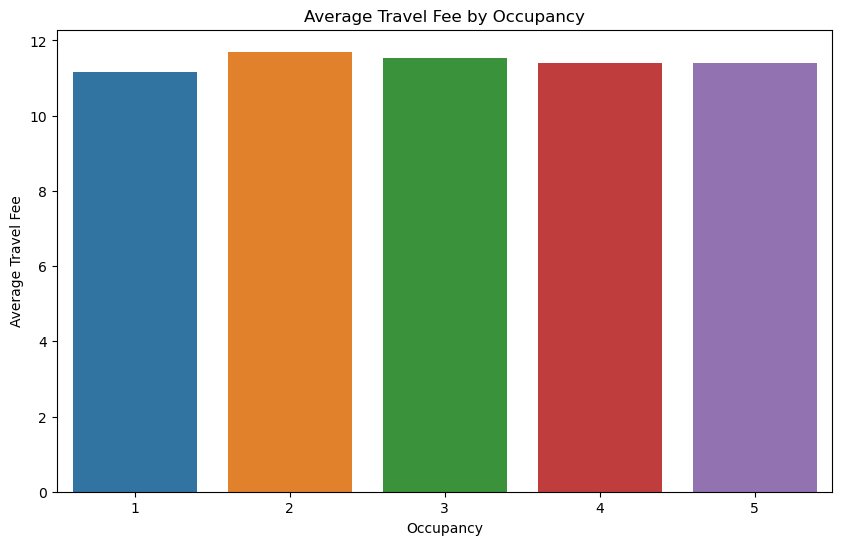

In [26]:
# Diagram 1 Average travel fee by occupancy
avg_fee_by_occupancy = travelfee_train.groupby('occupancy')['travel_fee'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_fee_by_occupancy.index, y=avg_fee_by_occupancy.values)
plt.title('Average Travel Fee by Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Average Travel Fee')
plt.show()

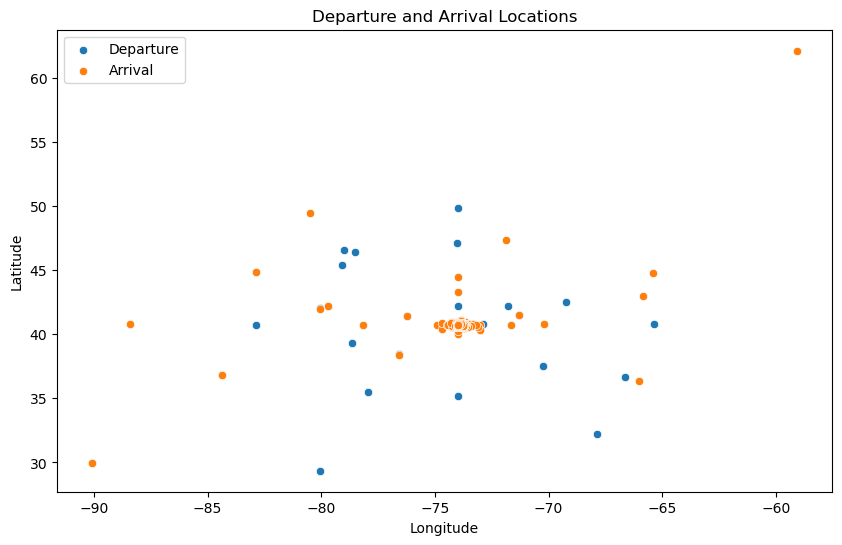

In [27]:
#Diagram 2 Departure and Arrival Locations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=travelfee_train, x='departure_long', y='departure_lat', label='Departure')
sns.scatterplot(data=travelfee_train, x='arrival_long', y='arrival_lat', label='Arrival')
plt.title('Departure and Arrival Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [28]:
# Query 1. Query to find the most common departure hour:
travelfee_train['departure_hour'] = pd.to_datetime(travelfee_train['departure_time']).dt.hour
most_common_departure_hour = travelfee_train['departure_hour'].mode()[0]
print("Most Common Departure Hour:", most_common_departure_hour)

Most Common Departure Hour: 19


In [29]:
# Query 2: Average Travel Fee by Occupancy
average_fee_by_occupancy = travelfee_train.groupby('occupancy')['travel_fee'].mean()
print("Average Travel Fee by Occupancy:")
print(average_fee_by_occupancy)

Average Travel Fee by Occupancy:
occupancy
1    11.165439
2    11.700522
3    11.542546
4    11.400846
5    11.394872
Name: travel_fee, dtype: float64


In [30]:
# Query 3: Average Travel Fee by Hour
travelfee_train['departure_time'] = pd.to_datetime(travelfee_train['departure_time'])
travelfee_train['hour'] = travelfee_train['departure_time'].dt.hour
average_fee_by_hour = travelfee_train.groupby('hour')['travel_fee'].mean()
print("Average Travel Fee by Hour:")
print(average_fee_by_hour)

Average Travel Fee by Hour:
hour
0     11.943701
1     11.787937
2     11.916411
3     12.273035
4     13.255159
5     13.018427
6     10.560291
7     10.552684
8     10.975419
9     11.239466
10    11.079697
11    11.229523
12    11.226867
13    11.379162
14    11.476018
15    11.293180
16    11.309047
17    11.115605
18    11.029559
19    10.700587
20    10.775220
21    11.118017
22    11.509535
23    11.806528
Name: travel_fee, dtype: float64


### Modelling

### Model 1: Random Forest Regressor

In [ ]:
#Predict fair price
#Model 1: Random Reofest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(
    preprocessing,
    RandomForestRegressor(random_state=42)
)

forest_rmses = -cross_val_score(forest_reg, x1_train, y1_train,
                                scoring="neg_root_mean_squared_error",
                                cv=3)
forest_rmses

In [ ]:
pd.Series(forest_rmses).describe()

In [ ]:
from sklearn.model_selection import cross_validate
forest_rmses = cross_validate(forest_reg,
                              x1_train, y1_train,
                              scoring="neg_root_mean_squared_error",
                              cv=2,
                              return_train_score=True)

forest_rmses

In [ ]:
forest_reg.fit(x1_train, y1_train)
travelfee_predictions = forest_reg.predict(x1_train)
forest_rmse = mean_squared_error(y1_train,
                                 travelfee_predictions,
                                 squared=False)
forest_rmse

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y1_train, y=travelfee_predictions)
plt.xlabel('Actual Travel Fee')
plt.ylabel('Predicted Travel Fee')
plt.title('Actual vs. Predicted Travel Fee')
plt.show()

In [ ]:
# Feature Importance Bar Plot:
# Get feature importances from the trained Random Forest model
feature_importances = forest_reg.named_steps['randomforestregressor'].feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=num_attribs)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [ ]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    forest_reg, x1_train, y1_train, cv=2, scoring='neg_mean_squared_error'
)

# Calculate mean and standard deviation of scores
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Create learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='Validation')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [ ]:
# Create a DataFrame to display actual and predicted prices
result_df = pd.DataFrame({
    'Actual Price': y1_train,
    'Predicted Price': travelfee_predictions
})

# Display the first few rows of the DataFrame
print(result_df.head())

### Fine Tuning

In [ ]:
### Model 1: Random Forest Regressor

In [ ]:
rf_regressor = RandomForestRegressor(random_state=42)
# Create a pipeline with preprocessing and random forest regressor
rf_full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("rf_reg", rf_regressor),
])

# Define the parameter grid for hyperparameter tuning
param_distributions = [
    {'rf_reg__n_estimators': [100, 200, 300],
     'rf_reg__max_depth': [None, 10, 20],
     'rf_reg__min_samples_split': [2, 5, 10]}
]

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf_full_pipeline, param_distributions, cv=2, scoring='neg_mean_squared_error')

# Assuming 'travelfee' is your feature data and 'travelfee_labels' are the target labels
grid_search_rf.fit(x1_train, y1_train)


# Perform randomized search with cross-validation
random_search_rf = RandomizedSearchCV(rf_full_pipeline, param_distributions,
                                      n_iter=10, cv=2, scoring='neg_mean_squared_error',
                                      random_state=42)

# Assuming 'travelfee' is your feature data and 'travelfee_labels' are the target labels
random_search_rf.fit(x1_train, y1_train)

# Calculate RMSE and standard deviation of RMSE for grid search
grid_rmse_scores = np.sqrt(-grid_search_rf.cv_results_['mean_test_score'])
grid_rmse_mean = np.mean(grid_rmse_scores)
grid_rmse_std = np.std(grid_rmse_scores)

# Calculate RMSE and standard deviation of RMSE for randomized search
randomized_rmse_scores = np.sqrt(-random_search_rf.cv_results_['mean_test_score'])
randomized_rmse_mean = np.mean(randomized_rmse_scores)
randomized_rmse_std = np.std(randomized_rmse_scores)

# Print the results
print("Grid Search RMSE - Mean:", grid_rmse_mean)
print("Grid Search RMSE - Standard Deviation:", grid_rmse_std)
print("Randomized Search RMSE - Mean:", randomized_rmse_mean)
print("Randomized Search RMSE - Standard Deviation:", randomized_rmse_std)

# Print best parameters
print("Tuned hyperparameters (best parameters):", random_search_rf.best_params_)


### Model 2: Ridge Refression